# Spatial modeling post modeling figure and table construction

-   post-modeling visualization
-   environmental correlations
-   soil and point map generation
-   gridding example plot

In [1]:
load_packages <- function(packages) {
  # Check for uninstalled packages
  uninstalled <- packages[!packages %in% installed.packages()[,"Package"]]
  
  # Install uninstalled packages
  if(length(uninstalled)) install.packages(uninstalled, dependencies = TRUE)

  # Load all packages
  for (pkg in packages) {
    if (!require(pkg, character.only = TRUE, quietly = TRUE)) {
      message(paste("Failed to load package:", pkg))
    }
  }
}

# List of packages to check, install, and load
packages <- c("tidyverse", "mgcv", "stars", "terra",  
              "ggpubr", "patchwork", "janitor", "sf","tidyterra",
              "here","ggpubr","MetBrewer","rnaturalearth",'viridis','broom')

load_packages(packages)

i_am('README.md')

# Setting R options for jupyterlab
options(repr.plot.width = 10, repr.plot.height = 10)


Installing packages into ‘/opt/homebrew/lib/R/4.4/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rJava’, ‘sftime’, ‘areal’, ‘slippymath’, ‘OpenStreetMap’, ‘exactextractr’, ‘gstat’, ‘lwgeom’, ‘ncdfgeom’, ‘raster’, ‘maptiles’


trying URL 'https://cran.rstudio.com/src/contrib/rJava_1.0-11.tar.gz'
Content type 'application/x-gzip' length 634103 bytes (619 KB)
downloaded 619 KB

trying URL 'https://cran.rstudio.com/src/contrib/sftime_0.3.0.tar.gz'
Content type 'application/x-gzip' length 89093 bytes (87 KB)
downloaded 87 KB

trying URL 'https://cran.rstudio.com/src/contrib/areal_0.1.8.tar.gz'
Content type 'application/x-gzip' length 1408610 bytes (1.3 MB)
downloaded 1.3 MB

trying URL 'https://cran.rstudio.com/src/contrib/slippymath_0.3.1.tar.gz'
Content type 'application/x-gzip' length 2670727 bytes (2.5 MB)
downloaded 2.5 MB

trying URL 'https://cran.rstudio.com/src/contrib/OpenStreetMap_0.4.0.tar.gz'
Content type 'application/x-gzip' length 2238753 bytes (2.1 MB)
downloaded 2.1 MB

trying URL 'https://cran.rstudio.com/src/contrib/exactextractr_0.10.0.tar.gz'
Content type 'application/x-gzip' length 630630 bytes (615 KB)
downloaded 615 KB

trying URL 'https://cran.rstudio.com/src/contrib/gstat_2.1-2.tar.gz'
C

checking for gcc... clang
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether clang accepts -g... yes
checking for clang option to accept ISO C89... none needed
checking how to run the C preprocessor... clang -E
checking for grep that handles long lines and -e... /usr/bin/grep
checking for egrep... /usr/bin/grep -E
checking for ANSI C header files... 

rm: conftest.dSYM: is a directory
rm: conftest.dSYM: is a directory

yes
checking for sys/wait.h that is POSIX.1 compatible... yes
checking for sys/types.h... yes
checking for sys/stat.h... yes
checking for stdlib.h... yes
checking for string.h... yes
checking for memory.h... yes
checking for strings.h... yes
checking for inttypes.h... yes
checking for stdint.h... yes
checking for unistd.h... yes
checking for string.h... (cached) yes
checking sys/time.h usability... yes
checking sys/time.h presence... yes
checking for sys/time.h... yes
checking for unistd.h... (cached) yes
checking for an ANSI C-conforming const... yes
checking whether time.h and sys/time.h may both be included... yes
configure: checking whether clang supports static inline...
yes
checking whether setjmp.h is POSIX.1 compatible... yes
checking whether sigsetjmp is declared... yes
checking whether siglongjmp is declared... yes
checking Java support in R... 

configure: error: absent
R was configured without Java support. Please run
R CMD javareconf
as root to add Java support to R.

If you do not have root privileges, run
R CMD javareconf -e
to set all Java-related variables and then install rJava.
ERROR: configuration failed for package ‘rJava’
* removing ‘/opt/homebrew/lib/R/4.4/site-library/rJava’
* installing *source* package ‘sftime’ ...
** package ‘sftime’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (sftime)
* installing *source* package ‘areal’ ...
** package ‘areal’ successfully unpacked and MD5 sums checked
** using staged installation

configure: CC: clang
configure: CXX: clang++ -std=gnu++17
configure: pkg-config proj exists, will use it
configure: using proj.h.
configure: PROJ: 9.5.1
checking PROJ: checking whether linking against PROJ works:... yes

ld: warning: ignoring duplicate libraries: '-lz'

configure: POSTGIS_PROJ_VERSION: 95
checking for geos-config... /opt/homebrew/bin/geos-config
checking geos-config usability... yes
configure: GEOS: 3.13.0
checking GEOS version >= 3.5.0... yes
checking geos: linking with -L/opt/homebrew/Cellar/geos/3.13.0/lib -lgeos_c... yes
checking for GEOS_init_r in -lgeos_c... yes
configure: Package CPP flags:   -I/opt/homebrew/Cellar/proj/9.5.1/include -I/opt/homebrew/opt/libtiff/include -I/opt/homebrew/opt/zstd/include -I/opt/homebrew/Cellar/xz/5.6.3/include -I/opt/homebrew/opt/jpeg-turbo/include -DHAVE_PROJ_H  -DPOSTGIS_PROJ_VERSION=95 -DUSE_PROJ_H -I/opt/homebrew/Cellar/geos/3.13.0/include  -DPOSTGIS_PROJ_VERSION=95 -DUSE_PROJ_H -I/opt/homebrew/Cellar/geos/3.13.0/include -DPOSTGIS_GEOS_VERSION=35 -I./liblwgeom -DHAVE_LIBGEOM_INTERNAL_H
configure: Package LIBS: -L/opt/homebrew/Cellar/proj/9.5.1/lib -lproj -lc++ -lm -ldl -lsqlite3 -L/opt/homebrew/opt/libtiff/lib -ltiff -L/opt/homebrew/opt/zstd/lib -lzstd -L/opt/homebrew/Cellar/xz/5.6.3/lib -llzm

** libs
using C++ compiler: ‘Apple clang version 16.0.0 (clang-1600.0.26.6)’
using SDK: ‘MacOSX15.2.sdk’

clang++ -std=gnu++17 -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG -I/opt/homebrew/Cellar/proj/9.5.1/include -I/opt/homebrew/opt/libtiff/include -I/opt/homebrew/opt/zstd/include -I/opt/homebrew/Cellar/xz/5.6.3/include -I/opt/homebrew/opt/jpeg-turbo/include -DHAVE_PROJ_H  -DPOSTGIS_PROJ_VERSION=95 -DUSE_PROJ_H -I/opt/homebrew/Cellar/geos/3.13.0/include  -DPOSTGIS_PROJ_VERSION=95 -DUSE_PROJ_H -I/opt/homebrew/Cellar/geos/3.13.0/include -DPOSTGIS_GEOS_VERSION=35 -I./liblwgeom -DHAVE_LIBGEOM_INTERNAL_H -I'/opt/homebrew/lib/R/4.4/site-library/Rcpp/include' -I'/opt/homebrew/lib/R/4.4/site-library/sf/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -g -O2   -c geodetic.cpp -o geodetic.o
clang++ -std=gnu++17 -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG -I/opt/homebrew/Cellar/proj/9.5.1/include -I/opt/homebrew/opt/libtiff/include -I/opt/homebrew/opt/zstd/include -I/opt/homeb

ld: warning: ignoring duplicate libraries: '-lc++', '-lgeos_c', '-lz'
installing to /opt/homebrew/lib/R/4.4/site-library/00LOCK-lwgeom/00new/lwgeom/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (lwgeom)
* installing *source* package ‘raster’ ...
** package ‘raster’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘Apple clang version 16.0.0 (clang-1600.0.26.6)’
using C++ compiler: ‘Apple clang version 16.0.0 (clang-1600.0.26.6)’
using SDK: ‘MacOSX15.2.sdk’

clang++ -std=gnu++17 -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.4/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -g -O2   -c RasterModule.cpp -o RasterModule.o
clang++ -std=gnu++17 -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.4/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -g -O2   -c RcppExports.cpp -o RcppExports.o
clang++ -std=gnu++17 -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.4/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -g -O2   -c aggregate.cpp -o aggregate.o
clang++ -std=gnu++17 -I"/opt/homebrew/Cellar/r/4.4.

installing to /opt/homebrew/lib/R/4.4/site-library/00LOCK-raster/00new/raster/libs
** R
** inst
** byte-compile and prepare package for lazy loading

in method for ‘initialize’ with signature ‘"BasicRaster"’: no definition for class “BasicRaster”
in method for ‘brick’ with signature ‘x="kasc"’: no definition for class “kasc”
in method for ‘brick’ with signature ‘x="grf"’: no definition for class “grf”
in method for ‘coerce’ with signature ‘"STFDF","RasterBrick"’: no definition for class “STFDF”
in method for ‘coerce’ with signature ‘"STSDF","RasterBrick"’: no definition for class “STSDF”
in method for ‘coerce’ with signature ‘"asc","RasterLayer"’: no definition for class “asc”
in method for ‘coerce’ with signature ‘"RasterLayer","asc"’: no definition for class “asc”
in method for ‘coerce’ with signature ‘"kasc","RasterBrick"’: no definition for class “kasc”
in method for ‘coerce’ with signature ‘"kasc","RasterStack"’: no definition for class “kasc”
in method for ‘coerce’ with signature ‘"kde","RasterLayer"’: no definition for class “kde”
in method for ‘coerce’ with signature ‘"grf","RasterBrick"’: no definition for class “grf”
in me

** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (raster)
* installing *source* package ‘stars’ ...
** package ‘stars’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
*** moving datasets to lazyload DB
** demo
** inst
** byte-compile and prepare package for lazy loading

in method for ‘coerce’ with signature ‘"stars","Raster"’: no definition for class “Raster”
in method for ‘coerce’ with signature ‘"stars_proxy","Raster"’: no definition for class “Raster”
in method for ‘coerce’ with signature ‘"stars","SpatRaster"’: no definition for class “SpatRaster”
in method for ‘coerce’ with signature ‘"stars_proxy","SpatRaster"’: no definition for class “SpatRaster”
in method for ‘coerce’ with signature ‘"stars","STFDF"’: no definition for class “STFDF”
in method for ‘coerce’ with signature ‘"stars","Spatial"’: no definition for class “Spatial”

** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (stars)
* installing *source* package ‘tidyterra’ ...
** package ‘tidyterra’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (tidyterra)
* installing *source* package ‘slippymath’ ...
** package ‘slippymath’ s

configure: exactextractr: 0.10.0
checking for geos-config... /opt/homebrew/bin/geos-config
checking geos-config usability... yes
configure: GEOS version: 3.13.0
checking geos version at least 3.5.0... yes
checking compiling and building against geos_c... yes
configure: PKG_CXX: clang++ -std=gnu++17
configure: PKG_CXXFLAGS: -g -O2 -I/opt/homebrew/Cellar/geos/3.13.0/include
configure: PKG_LIBS: -L/opt/homebrew/opt/gettext/lib -L/opt/homebrew/opt/readline/lib -L/opt/homebrew/opt/xz/lib -L/opt/homebrew/lib -L/opt/homebrew/Cellar/geos/3.13.0/lib -lgeos_c
configure: creating ./config.status
config.status: creating src/Makevars

** libs
using C++ compiler: ‘Apple clang version 16.0.0 (clang-1600.0.26.6)’
using C++14
using SDK: ‘MacOSX15.2.sdk’

clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.4/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -g -O2 -I/opt/homebrew/Cellar/geos/3.13.0/include -fPIC  -g -O2   -c RcppExports.cpp -o RcppExports.o
clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.4/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -g -O2 -I/opt/homebrew/Cellar/geos/3.13.0/include -fPIC  -g -O2   -c exact_extract.cpp -o exact_extract.o
clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.4/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   

installing to /opt/homebrew/lib/R/4.4/site-library/00LOCK-exactextractr/00new/exactextractr/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (exactextractr)
* installing *source* package ‘gstat’ ...
** package ‘gstat’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘Apple clang version 16.0.0 (clang-1600.0.26.6)’
using SDK: ‘MacOSX15.2.sdk’

clang -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG -DR_NO_REMAP  -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -g -O2  -c block.c -o block.o
clang -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG -DR_NO_REMAP  -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -g -O2  -c data.c -o data.o
clang -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG -DR_NO_REMAP  -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -g -O2  -c direct.c -o direct.o
clang -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG -DR_NO_REMAP  -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -g -O2  -c fit.c -o fit.o
clang -I"/opt/homebr

installing to /opt/homebrew/lib/R/4.4/site-library/00LOCK-gstat/00new/gstat/libs
** R
** data
** demo
** inst
** byte-compile and prepare package for lazy loading

in method for ‘krige’ with signature ‘"formula","sf"’: no definition for class “sf”
in method for ‘idw’ with signature ‘"formula","sf"’: no definition for class “sf”
in method for ‘krige.cv’ with signature ‘"formula","sf"’: no definition for class “sf”

** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (gstat)
* installing *source* package ‘ncdfgeom’ ...
** package ‘ncdfgeom’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (ncdfgeom)
* installing *source* package ‘maptiles’ ...
** package ‘maptiles’ successfully unpacked an

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package to force all conflicts to become errors

Attaching package: ‘nlme’

The following object is masked from ‘package:dplyr’:

    collapse

This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.
Linking to GEOS 3.13.0, GDAL 3.10.1, PROJ 9.5.1; sf_use_s2() is TRUE
terra 1.8.15

Attaching package: ‘terra’

The following object is masked from ‘package:tidyr’:

    extract


Attaching package: ‘ggpubr’

The following object is masked from

Warning messages:
1: In install.packages(uninstalled, dependencies = TRUE) :
  installation of package ‘rJava’ had non-zero exit status
2: In install.packages(uninstalled, dependencies = TRUE) :
  installation of package ‘OpenStreetMap’ had non-zero exit status

here() starts at /Users/lawton/SideProjects/herbivore_nutrient_interactions

# Section 1 - Post spatial modeling visualization

## Nitrogen and Phosphorus

showing the relationship between outbreak and nil observations to soil nitrogen and phosphorus

In [2]:

outbreak_model_results <- read_csv(here("output/spatial_modeling/outbreak_model_smooth_estimates.csv"),show_col_types = FALSE) |>
    filter(.smooth %in% c('s(nitrogen)','s(phosphorus)')) |>
    select(.smooth,.estimate,.se,nitrogen,phosphorus) |>
    mutate(model = 'outbreak')


nil_model_results <- read_csv(here("output/spatial_modeling/nil_model_smooth_estimates.csv"),show_col_types = FALSE) |>
    filter(.smooth %in% c('s(nitrogen)','s(phosphorus)')) |>
    select(.smooth,.estimate,.se,nitrogen,phosphorus)  |>
    mutate(model = 'nil')

combine_dat <- rbind(outbreak_model_results,nil_model_results)

In [3]:
combine_dat |> summary()

   .smooth            .estimate             .se             nitrogen         phosphorus         model          
 Length:400         Min.   :-0.51405   Min.   :0.02356   Min.   :0.02263   Min.   :0.00963   Length:400        
 Class :character   1st Qu.:-0.15765   1st Qu.:0.02478   1st Qu.:0.11762   1st Qu.:0.05739   Class :character  
 Mode  :character   Median :-0.03445   Median :0.03381   Median :0.21183   Median :0.10503   Mode  :character  
                    Mean   :-0.04231   Mean   :0.03667   Mean   :0.21182   Mean   :0.10536                     
                    3rd Qu.: 0.06018   3rd Qu.:0.04245   3rd Qu.:0.30533   3rd Qu.:0.15261                     
                    Max.   : 0.59066   Max.   :0.10095   Max.   :0.39963   Max.   :0.21246                     
                                                         NA's   :200       NA's   :200                         

Warning message:
Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated. 
Warning message:
Removed 38 rows containing missing values or values outside the scale range (`geom_line()`). 

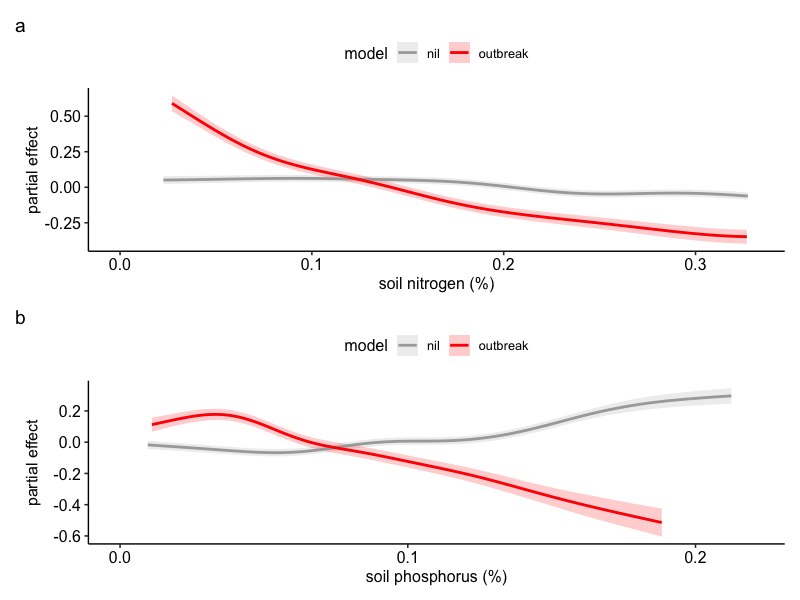

In [4]:
p1 <- combine_dat |>
  filter(.smooth == "s(nitrogen)") |>
  ggplot(aes(x=nitrogen)) + 
    geom_ribbon(aes(ymin=.estimate - .se, ymax=.estimate + .se,fill=model),alpha=.2) +
    geom_line(aes(y = .estimate ,color=model),size=1) + 
    theme_pubr() +
    scale_color_manual(values = c('dark grey','red'))  +
    scale_fill_manual(values = c('dark grey','red')) +
    xlab("soil nitrogen (%)") +
    ylab("partial effect") +
    scale_x_continuous(limits = c(0,0.33),breaks = c(0,0.1,0.2,0.3))

p2 <- combine_dat |>
  filter(.smooth == "s(phosphorus)") |>
  ggplot(aes(x=phosphorus)) + 
    geom_ribbon(aes(ymin=.estimate - .se, ymax=.estimate + .se,fill=model),alpha=.2) +
    geom_line(aes(y = .estimate ,color=model),size=1) + 
    theme_pubr() +
    scale_color_manual(values = c('dark grey','red'))  +
    scale_fill_manual(values = c('dark grey','red')) +
    xlab("soil phosphorus (%)") +
    ylab("partial effect")  +
    scale_x_continuous(limits = c(0,0.22),breaks = c(0,0.1,0.2))

soil_outbreak_plot <- (p1) / (p2) +
    plot_annotation(tag_levels = 'a')
soil_outbreak_plot

In [17]:

ggsave(soil_outbreak_plot,
       file=here('output/publication_figures/spatial_modeling_locust_outbreak_with_soil_NTO_PTO.png'),
       width=5,height=10)

Warning message:
“Removed 54 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_line()`).”

## Other variable visualization – outbreaks

In [3]:
outbreak_model_results <- read_csv(here("output/spatial_modeling/outbreak_model_smooth_estimates.csv"),show_col_types = FALSE)

In [5]:
outbreak_raw_data <- read_csv(here("data/processed/spatial_modeling/spatial_modeling_locust_outbreak_model_data.csv"),show_col_types = FALSE)
outbreak_raw_data

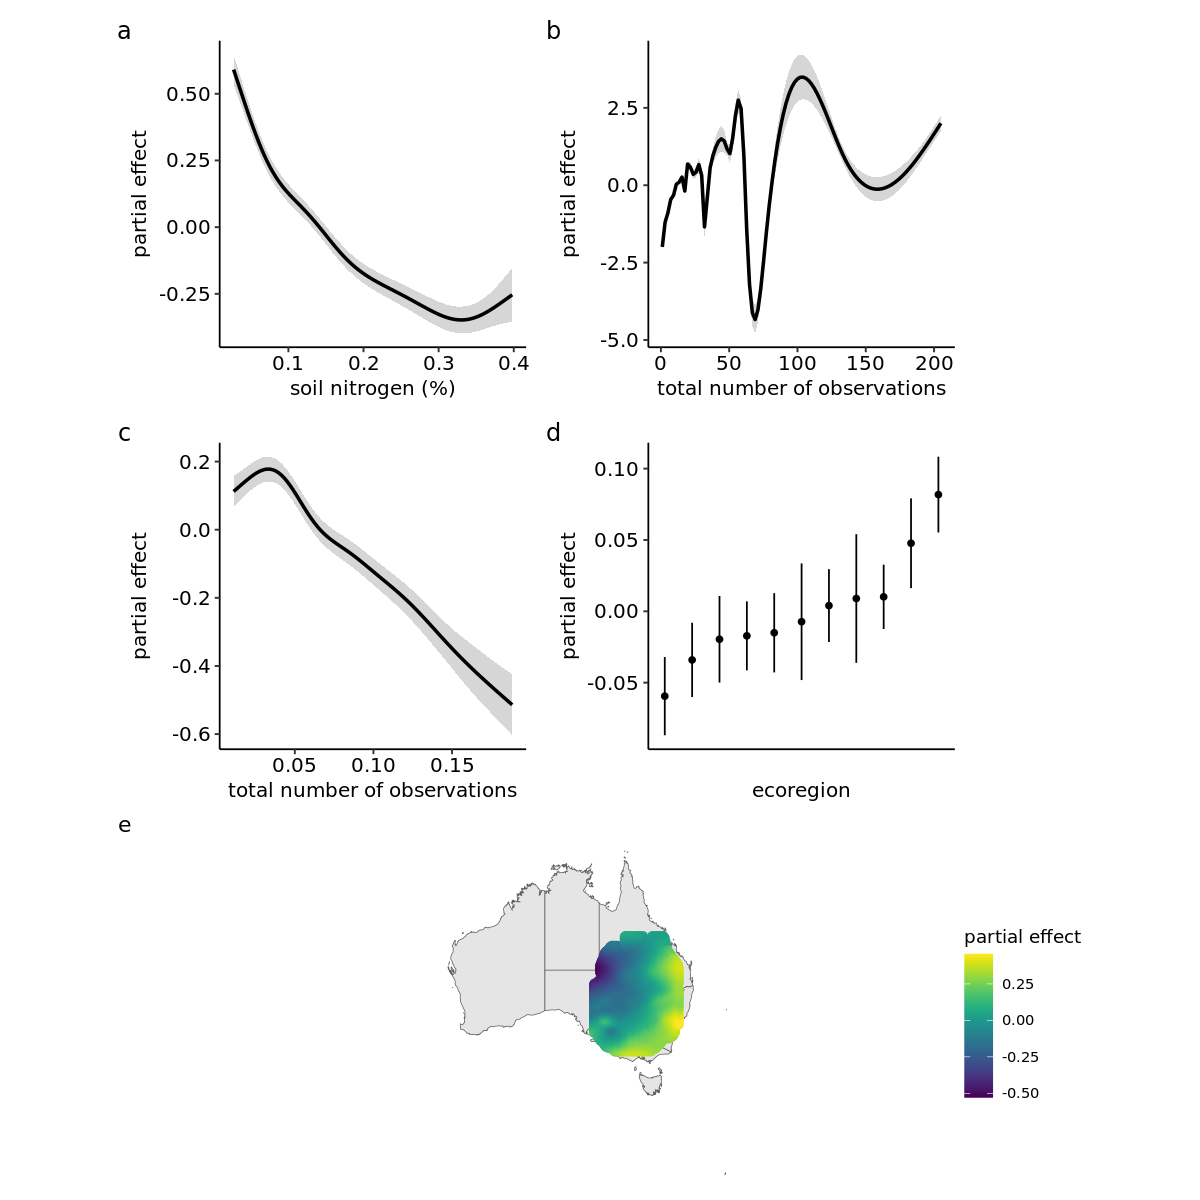

In [9]:


p1 <- outbreak_model_results |>
  filter(.smooth == "s(nitrogen)") |>
  ggplot(aes(x=nitrogen)) + 
    geom_ribbon(aes(ymin=.estimate - .se, ymax=.estimate + .se),alpha=.2) +
    geom_line(aes(y = .estimate),size=1) +
    theme_pubr() +
    xlab("soil nitrogen (%)") +
    ylab("partial effect")

p2 <- outbreak_model_results |>
  filter(.smooth == "s(nymph_density_total_count)") |>
  ggplot(aes(x=nymph_density_total_count)) + 
    geom_ribbon(aes(ymin=.estimate - .se, ymax=.estimate + .se),alpha=.2) +
    geom_line(aes(y = .estimate),size=1) + 
    theme_pubr() +
    xlab("total number of observations") +
    ylab("partial effect")

aus <- ne_states(country = 'Australia')

map_dat <- outbreak_model_results |>
    drop_na(longitude,latitude,.estimate) |>
    st_as_sf(coords = c("longitude", "latitude"),crs= "+proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0")

p3 <- aus |>
    ggplot() +
        geom_sf() +
        geom_sf(data=map_dat,aes(color=.estimate)) +
        scale_color_viridis() +
        theme_void()  +
        labs(color="partial effect")

p4 <- outbreak_model_results |>
  filter(.smooth == "s(phosphorus)") |>
  ggplot(aes(x=phosphorus)) + 
    geom_ribbon(aes(ymin=.estimate - .se, ymax=.estimate + .se),alpha=.2) +
    geom_line(aes(y = .estimate),size=1) + 
    theme_pubr() +
    xlab("total number of observations") +
    ylab("partial effect")

p5 <- outbreak_model_results |>
    drop_na(ecoregion) |>
    ggplot(aes(y=.estimate, x=reorder(ecoregion,.estimate))) +
        geom_point() +
        geom_errorbar(aes(ymin = .estimate - .se, ymax = .estimate + .se),width=0) +
        theme_pubr() +
        ylab('partial effect') +
        xlab('ecoregion') +
        theme(axis.text.x=element_blank(),
            axis.ticks.x=element_blank())


layout <- '
AB
CD
EE
'

outbreak_all_model_variables <- p1 + p2 + p4 + p5 + p3 +
    plot_layout(design = layout) +
    plot_annotation(tag_levels = 'a')

outbreak_all_model_variables

In [403]:
ggsave(outbreak_all_model_variables,
       file=here('output/publication_figures/spatial_modeling_outbreak_all_model_variables.png'),
       width=10,height=15)

## Other variable visualization – nil observations

In [388]:
nil_model_results <- read_csv(here("output/spatial_modeling/nil_model_smooth_estimates.csv"),show_col_types = FALSE)

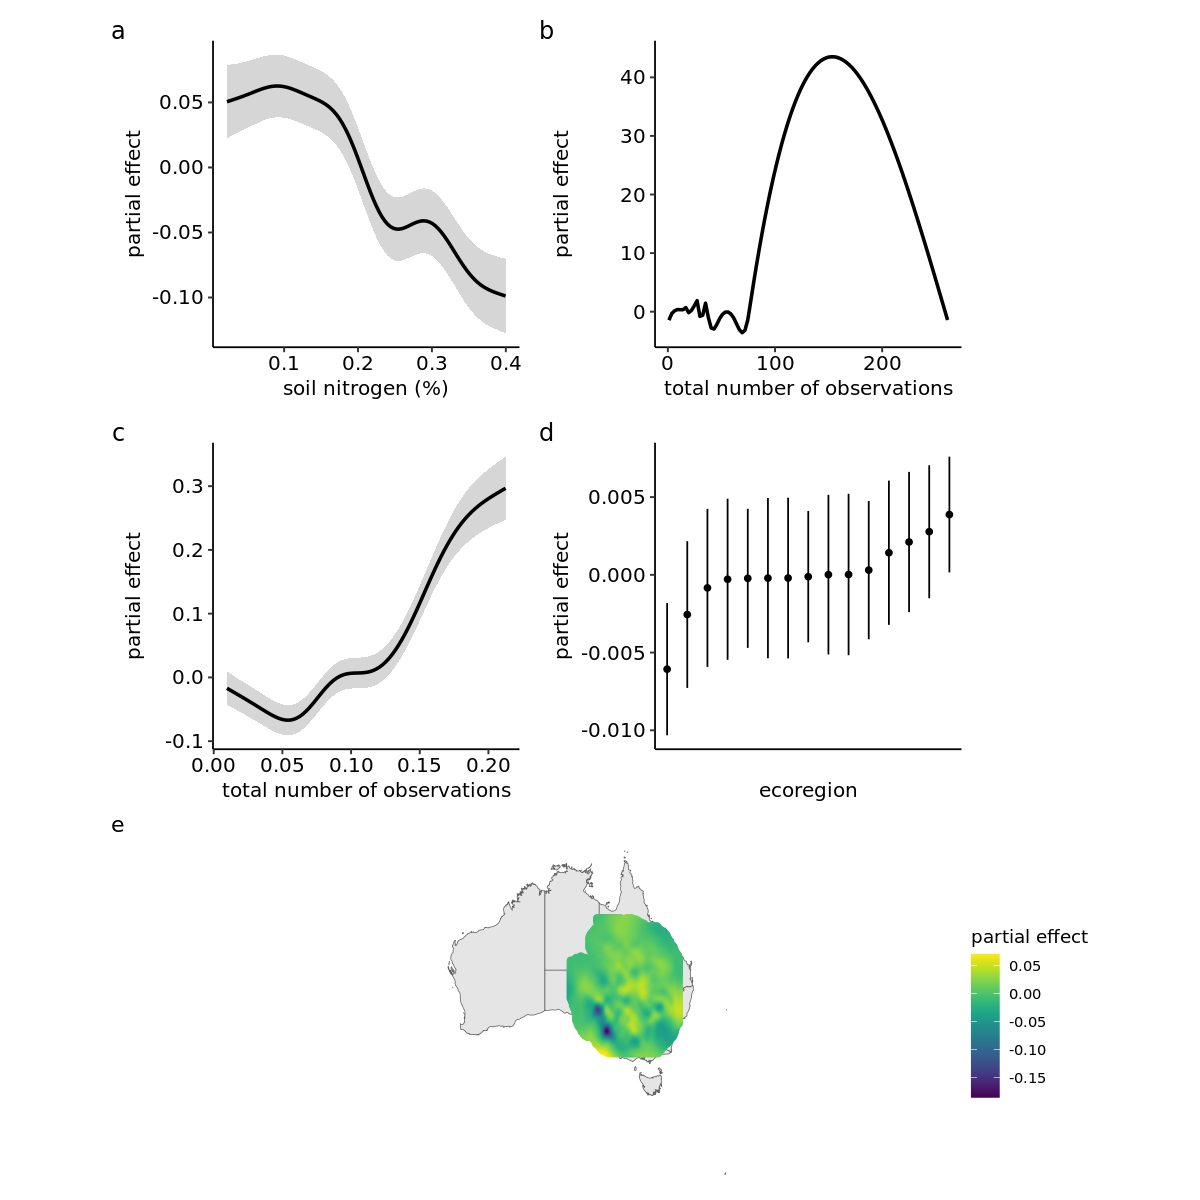

In [389]:


p1 <- nil_model_results |>
  filter(.smooth == "s(nitrogen)") |>
  ggplot(aes(x=nitrogen)) + 
    geom_ribbon(aes(ymin=.estimate - .se, ymax=.estimate + .se),alpha=.2) +
    geom_line(aes(y = .estimate),size=1) + 
    theme_pubr() +
    xlab("soil nitrogen (%)") +
    ylab("partial effect")

p2 <- nil_model_results |>
  filter(.smooth == "s(nymph_density_total_count)") |>
  ggplot(aes(x=nymph_density_total_count)) + 
    geom_ribbon(aes(ymin=.estimate - .se, ymax=.estimate + .se),alpha=.2) +
    geom_line(aes(y = .estimate),size=1) + 
    theme_pubr() +
    xlab("total number of observations") +
    ylab("partial effect")

aus <- ne_states(country = 'Australia')

map_dat <- nil_model_results |>
    drop_na(longitude,latitude,.estimate) |>
    st_as_sf(coords = c("longitude", "latitude"),crs= "+proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0")

p3 <- aus |>
    ggplot() +
        geom_sf() +
        geom_sf(data=map_dat,aes(color=.estimate)) +
        scale_color_viridis() +
        theme_void() +
        labs(color="partial effect")

p4 <- nil_model_results |>
  filter(.smooth == "s(phosphorus)") |>
  ggplot(aes(x=phosphorus)) + 
    geom_ribbon(aes(ymin=.estimate - .se, ymax=.estimate + .se),alpha=.2) +
    geom_line(aes(y = .estimate),size=1) + 
    theme_pubr() +
    xlab("total number of observations") +
    ylab("partial effect")

p5 <- nil_model_results |>
    drop_na(ecoregion) |>
    ggplot(aes(y=.estimate, x=reorder(ecoregion,.estimate))) +
        geom_point() +
        geom_errorbar(aes(ymin = .estimate - .se, ymax = .estimate + .se),width=0) +
        theme_pubr() +
        ylab('partial effect') +
        xlab('ecoregion') +
        theme(axis.text.x=element_blank(),
            axis.ticks.x=element_blank())


layout <- '
AB
CD
EE
'

nil_all_model_variables <- p1 + p2 + p4 + p5 + p3 +
    plot_layout(design = layout) +
    plot_annotation(tag_levels = 'a')

nil_all_model_variables

In [390]:
ggsave(nil_all_model_variables,
       file=here('output/publication_figures/spatial_modeling_nil_all_model_variables.png'),
       width=10,height=15)

## mean annual precipitation correlations

In [391]:
map_outbreak <- read_csv(here("output/spatial_modeling/map_outbreak_model_smooth_estimates.csv"),show_col_types = FALSE) |>
    drop_na(bio12) |>
    mutate(model = 'outbreak')

map_nil <- read_csv(here("output/spatial_modeling/map_nill_model_smooth_estimates.csv"),show_col_types = FALSE) |>
    drop_na(bio12) |>
    mutate(model = 'nil')


map_mod_results <- rbind(map_outbreak,map_nil)
map_mod_results |> head()

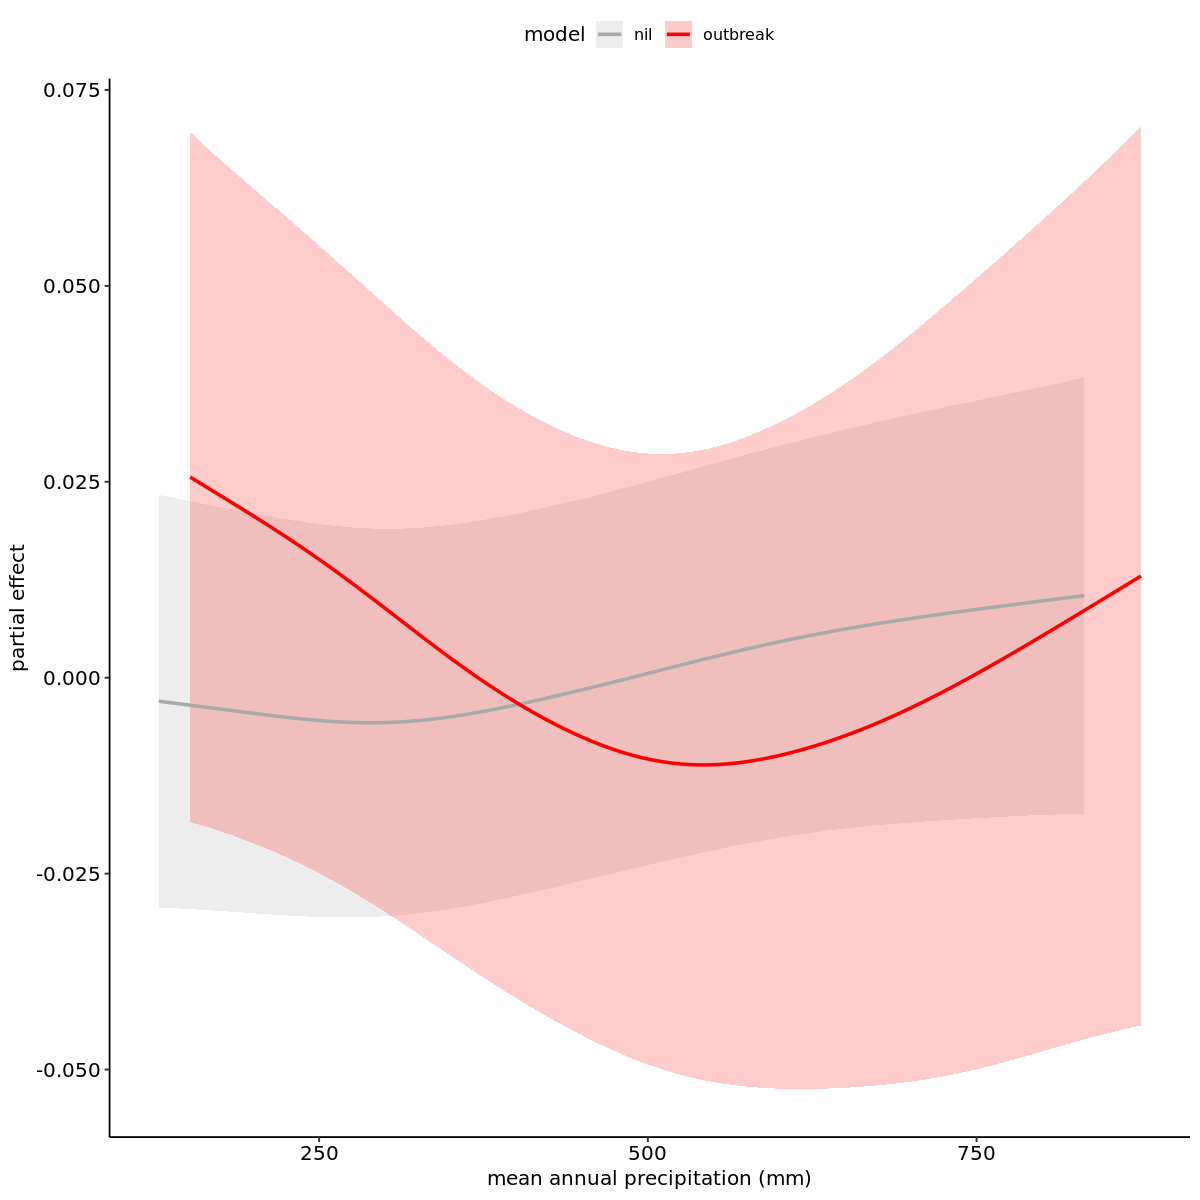

In [392]:
p1 <- map_mod_results |>
  filter(.smooth == "s(bio12)") |>
  ggplot(aes(x=bio12)) + 
    geom_ribbon(aes(ymin=.estimate - .se, ymax=.estimate + .se,fill=model),alpha=.2) +
    geom_line(aes(y = .estimate ,color=model),size=1) + 
    theme_pubr() +
    scale_color_manual(values = c('dark grey','red'))  +
    scale_fill_manual(values = c('dark grey','red')) +
    xlab("mean annual precipitation (mm)") +
    ylab("partial effect")


p1

In [393]:
ggsave(p1,
       file=here('output/publication_figures/spatial_modeling_locust_outbreak_with_map.png'),
       width=5,height=5)

# Section 2 - environmental correlations

This is just a randomly sampled 100k points between the soil and bioclim variables on google earth engine. This extraction code can be found here: `04_environmental_correlations_map_nitrogen_phosphorus_woody_cover.ipynb`

Specifically these correlations:

-   soil nitrogen x soil phosphorus
-   soil nitrogen x woody veg
-   soil nitrogen x MAP
-   soil phosphorus x woody veg
-   MAP x woody veg

In [35]:
# I min-max normalize to get all variables into the same scale for plotting.

minmax <- function(x, na.rm = TRUE) {
    return((x- min(x)) /(max(x)-min(x)))
}

env_dat <- read_csv(here('data/processed/spatial_modeling/environmental_correlation_data.csv'),show_col_types = FALSE) |>
    drop_na() |>
    mutate(mean_nto = minmax((NTO_000_005_EV + NTO_005_015_EV) / 2),
           mean_pto = minmax((PTO_000_005_EV + PTO_005_015_EV) / 2),
           annual_precip = minmax(bio12),
           tree_cover = minmax(tree_canopy_cover)) |>
    select(mean_pto,mean_nto,annual_precip,tree_cover)

env_dat |> head()

In [30]:
nto_pto_graph <- env_dat |>
    #slice_sample(n=10000) |>
    ggplot(aes(x=mean_nto,y=mean_pto)) +
        geom_abline(slope=1,linetype=3,linewidth=1.4) +
        geom_point(pch=21,alpha=0.3) +
        geom_smooth(method='gam',se=FALSE,linewidth=1.4) +
        xlim(0,1) +
        ylim(0,1) +
        theme_pubr() +
        xlab('soil nitrogen') +
        ylab('soil phosphorus')

nto_woody_graph <- env_dat |>
    #slice_sample(n=10000) |>
    ggplot(aes(x=mean_nto,y=tree_cover)) +
        geom_abline(slope=1,linetype=3,linewidth=1.4) +
        geom_point(pch=21,alpha=0.3) +
        geom_smooth(method='gam',se=FALSE,linewidth=1.4) +
        xlim(0,1) +
        ylim(0,1) +
        theme_pubr() +
        xlab('soil nitrogen') +
        ylab('woody tree cover')

nto_map_graph <- env_dat |>
    #slice_sample(n=10000) |>
    ggplot(aes(x=mean_nto,y=annual_precip)) +
        geom_abline(slope=1,linetype=3,linewidth=1.4) +
        geom_point(pch=21,alpha=0.3) +
        geom_smooth(method='gam',se=FALSE,linewidth=1.4) +
        xlim(0,1) +
        ylim(0,1) +
        theme_pubr() +
        xlab('soil nitrogen') +
        ylab('annual precipitation')

pto_woody_graph <- env_dat |>
    #lice_sample(n=10000) |>
    ggplot(aes(x=mean_pto,y=tree_cover)) +
        geom_abline(slope=1,linetype=3,linewidth=1.4) +
        geom_point(pch=21,alpha=0.3) +
        geom_smooth(method='gam',se=FALSE,linewidth=1.4) +
        xlim(0,1) +
        ylim(0,1) +
        theme_pubr() +
        xlab('soil phosphorus') +
        ylab('woody tree cover')

pto_map_graph <- env_dat |>
    #slice_sample(n=10000) |>
    ggplot(aes(x=mean_pto,y=annual_precip)) +
        geom_abline(slope=1,linetype=3,linewidth=1.4) +
        geom_point(pch=21,alpha=0.3) +
        geom_smooth(method='gam',se=FALSE,linewidth=1.4) +
        xlim(0,1) +
        ylim(0,1) +
        theme_pubr() +
        xlab('soil phosphorus') +
        ylab('annual precipitation')
        

In [137]:
layout <- "
AB
CD
E#
"
env_correlation_graph <- nto_pto_graph + nto_woody_graph + nto_map_graph + pto_woody_graph + pto_map_graph +
  plot_layout(design = layout) + plot_annotation(tag_levels = 'a') 

In [138]:
ggsave(env_correlation_graph,file=here('output/publication_figures/spatial_modeling_environment_correlation_figure.png'),width=10,height=15)

`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 18 rows containing missing values or values outside the scale range
(`geom_smooth()`).”
`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_smooth()`).”
`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'

# Section 3 - soil and point map generation

This figure will combine a few figures: - raw point distribution through australia - soil nitrogen map clipped to the locust distribution - soil phosphorus map clipped to the locust distribution

In [11]:
aus <- ne_states(country='Australia') |> 
    select(name,geometry)

point_dat <- read_csv(here('data/raw/survey_data/CT.csv'),show_col_types = FALSE) |>
    select(!`...1`) |>
    select(Latitude,Longitude,Species) |>
    st_as_sf(coords = c("Longitude", "Latitude"),
             crs= "+proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0")

nto_rast <- rast(here("data/raw/survey_data/apl_nitrogen_raster.tif"))
pto_rast <- rast(here("data/raw/survey_data/apl_phosphorus_raster.tif"))

New names:
• `` -> `...1`

Warning message:
/Users/lawton/SideProjects/herbivore_nutrient_interactions/data/raw/survey_data/apl_nitrogen_raster.tif: No such file or directory (GDAL error 4) 

In [58]:
nto_rast

class       : SpatRaster 
dimensions  : 1139, 2062, 1  (nrow, ncol, nlyr)
resolution  : 0.01796631, 0.01796631  (x, y)
extent      : 114.6789, 151.7255, -37.76517, -17.30155  (xmin, xmax, ymin, ymax)
coord. ref. : lon/lat WGS 84 (EPSG:4326) 
source      : apl_nitrogen_raster.tif 
name        : apl_nitrogen_raster 

In [191]:


point_map <- ggplot(aus) +
    geom_sf() +
    geom_sf(data=point_dat,size = 0.25) +
    theme_void() # + theme(legend.position="none")

nto_map <- ggplot(aus) +
    geom_sf(color=NA) +
    geom_spatraster(data = nto_rast, aes(fill = apl_nitrogen_raster))  +
    scale_fill_stepsn(n.breaks = 10,
                      colours = rev(terrain.colors(5)),
                      na.value = "transparent",
                      trans='log',
                      name="soil nitrogen \n(log-scaled)") +
    geom_sf(data = aus,fill=NA) +
    theme_void()  #+ theme(legend.position="none")

pto_map <-ggplot(aus) +
    geom_sf(color=NA) +
    geom_spatraster(data = pto_rast, aes(fill = apl_phosphorus_raster))  +
    scale_fill_stepsn(breaks= c(0.14,0.10,0.05,0.04,0.02,0.01),
                      colours = viridis::viridis(9),
                      na.value = "transparent",
                      trans='log',
                      name="soil phosphorus \n(log-scaled)") +
    geom_sf(data = aus,fill=NA) +
    theme_void()  #+ theme(legend.position="none")


<SpatRaster> resampled to 500752 cells.
<SpatRaster> resampled to 500752 cells.

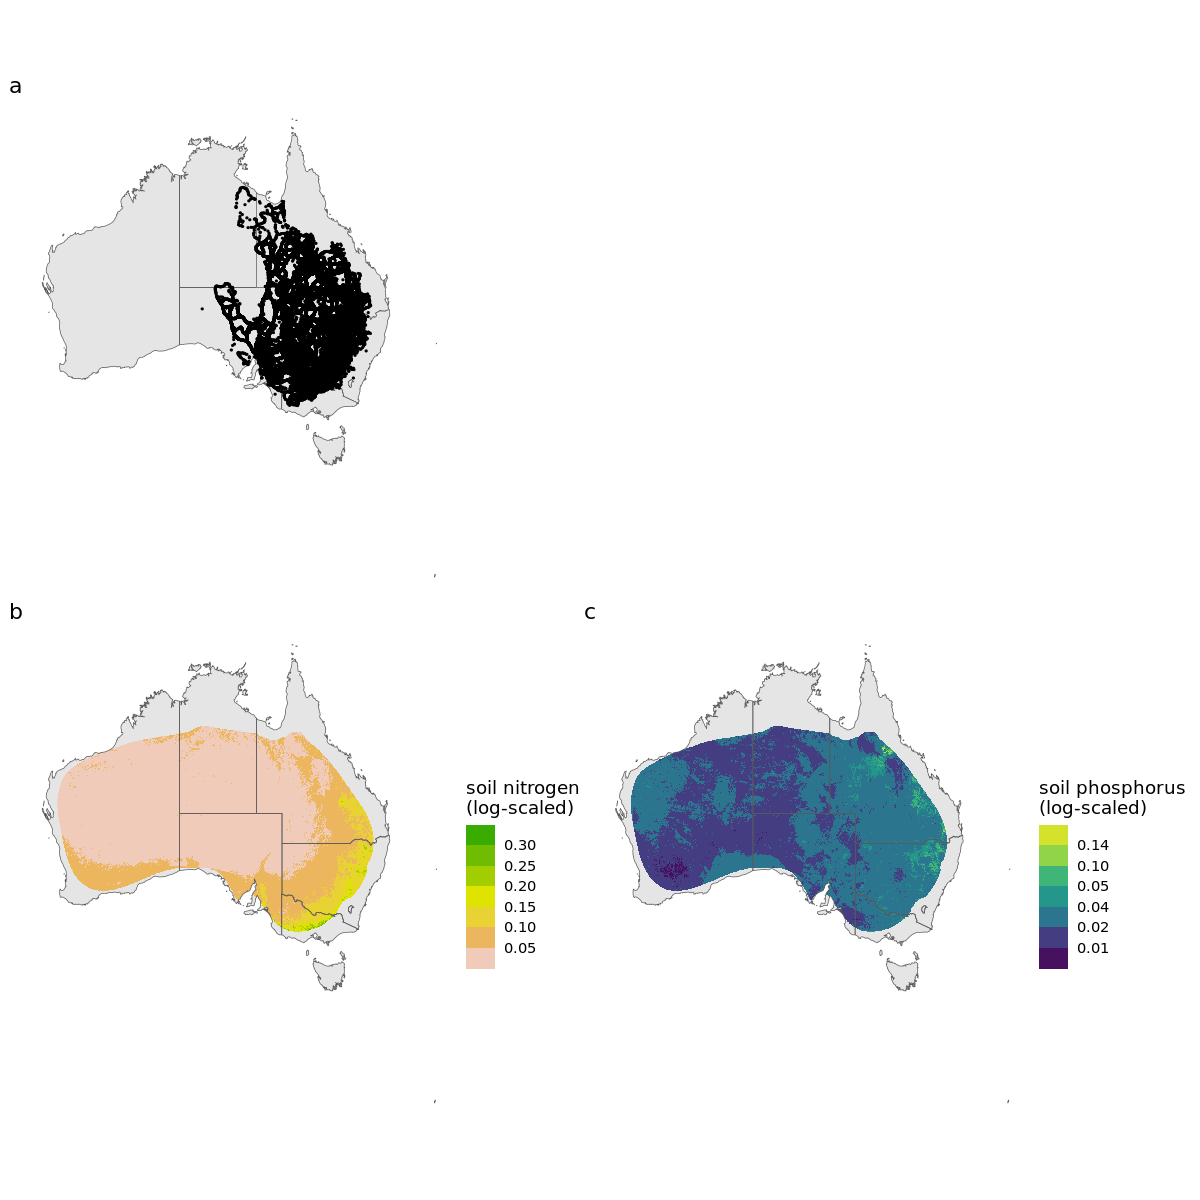

In [271]:

layout2 <- "
AAAA
AAAA
AAAA
AAAA
BBCC
BBCC
BBCC
BBCC
"
layout <- "
A#
BC
"

locust_env_maps <- point_map + nto_map + pto_map + 
    plot_annotation(tag_levels = 'a') +
    plot_layout(design = layout)

locust_env_maps

In [272]:
asp_ratio <- tmaptools::get_asp_ratio(aus)

ggsave(locust_env_maps,
       file=here('output/publication_figures/spatial_modeling_locust_env_map.png'),
       width=10*asp_ratio,height=10)

# Section 4 - griding example

I want to show an example gridding of the apl points

In [8]:
apl_distribution = st_read(here("data/raw/survey_data/australian_plague_locut_distribution/Australia_Locust_Distribution.shp"))
apl_distribution

In [27]:

# Creating a grid with cells 4000m x 4000m 
grid = st_make_grid(point_dat, cellsize = 1, 
                            what ="polygons", square = T)

overall_grid_map <- ggplot(aus) +
    geom_sf() +
    geom_sf(data=point_dat,size=0.5,alpha=0.6,pch=21) +
    geom_sf(data=grid,fill=NA,color='red') +
    theme_void()  +
  theme(
    plot.background = element_rect(fill = "white", color = NA)  # Set white background
  )

In [13]:
grid

Geometry set for 440 features 
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 131.6556 ymin: -37.71413 xmax: 151.6556 ymax: -15.71413
Geodetic CRS:  +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0
First 5 geometries:
POLYGON ((131.6556 -37.71413, 132.6556 -37.7141...
POLYGON ((132.6556 -37.71413, 133.6556 -37.7141...
POLYGON ((133.6556 -37.71413, 134.6556 -37.7141...
POLYGON ((134.6556 -37.71413, 135.6556 -37.7141...
POLYGON ((135.6556 -37.71413, 136.6556 -37.7141...

In [14]:
nsw <- aus |> filter(name == 'New South Wales')

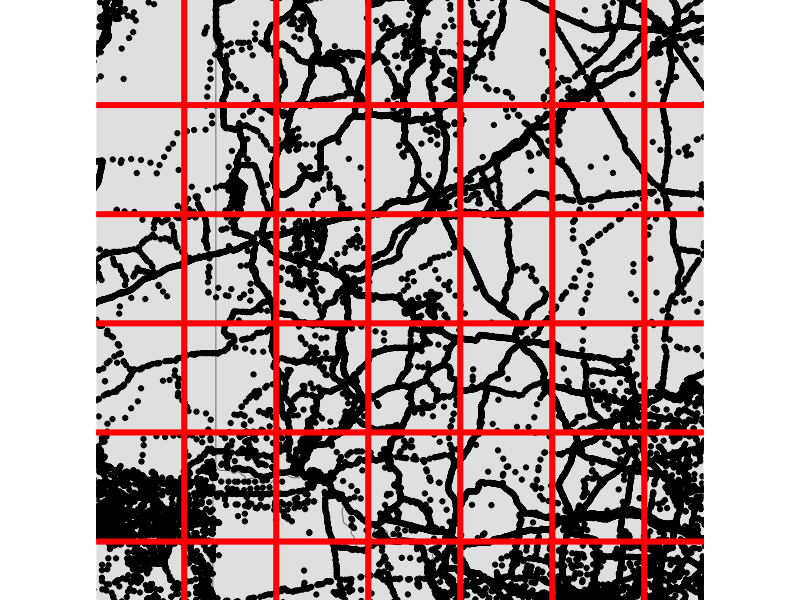

In [15]:
zoomed_plot <- ggplot(aus) +
    geom_sf() +
    geom_sf(data=point_dat) +
    geom_sf(data=grid,fill=NA,color='red',linewidth=2) +
    coord_sf(ylim = c(-30, -35), xlim = c(140, 146)) +
    theme_void()

zoomed_plot

In [28]:
overall_grid_map <- overall_grid_map  +
  geom_rect(aes(xmin = 140, xmax = 146, ymin = -35, ymax = -30), color = "white", fill = NA)


Warning message:
In geom_rect(aes(xmin = 140, xmax = 146, ymin = -35, ymax = -30),  :
  All aesthetics have length 1, but the data has 11 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing a single row.

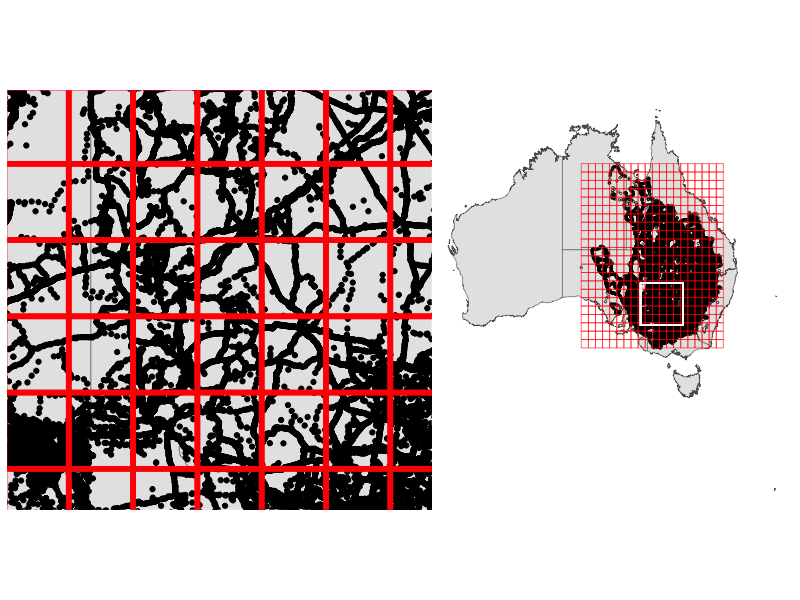

In [29]:
grid_examples <- zoomed_plot + overall_grid_map
grid_examples

In [30]:
asp_ratio <- tmaptools::get_asp_ratio(aus)

ggsave(grid_examples,
       file=here('output/publication_figures/spatial_modeling_grid_example_map.png'),
       width=10*asp_ratio,height=5)

Warning message:
In geom_rect(aes(xmin = 140, xmax = 146, ymin = -35, ymax = -30),  :
  All aesthetics have length 1, but the data has 11 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing a single row.

# Section 5 - table construction

In [380]:
outbreak_mod <- readRDS(here("output/spatial_modeling/model_objects/locust_outbreak_model.rds")) |>
    tidy() |>
    mutate(model = 'outbreak')

nil_mod <- readRDS(here("output/spatial_modeling/model_objects/locust_nil_model.rds")) |>
    tidy()  |>
    mutate(model = 'nil')

map_outbreak_mod <- readRDS(here("output/spatial_modeling/model_objects/locust_outbreak_map_model.rds"))|>
    tidy()  |>
    mutate(model = 'outbreak')

map_nil_outbreak_mod <- readRDS(here("output/spatial_modeling/model_objects/locust_nil_map_model.rds"))|>
    tidy()  |>
    mutate(model = 'nil')


overall_mods <-outbreak_mod |> rbind(nil_mod)

map_mods <-map_outbreak_mod |> rbind(map_nil_outbreak_mod)

In [381]:
write.csv(overall_mods, here("output/spatial_modeling/map_outbreak_model_results.csv"),row.names=FALSE)
